<a href="https://colab.research.google.com/github/kirtanakiran/Flight-delay-prediction/blob/main/Flight_Delay_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Required Packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score, classification_report , precision_recall_fscore_support
import joblib
import pickle

**Loading the Dataset**

In [ ]:
df = pd.read_csv("/content/flightdata.csv")
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

**Performing Univariate Analysis**

**Using Pie Chart**

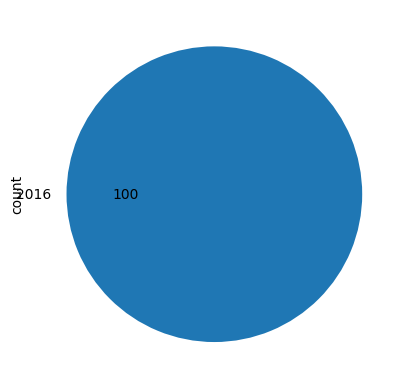

In [ ]:
df['YEAR'].value_counts().plot(kind ='pie', autopct='%.0f')
plt.show()

**Performing Bivariate Analysis**

**Using scatterPlot**

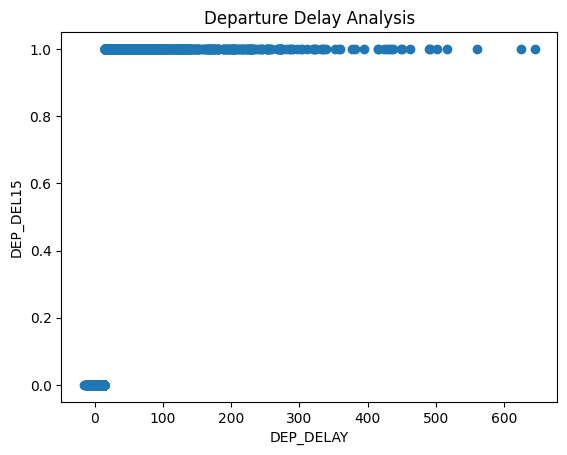

In [ ]:
plt.scatter(df.DEP_DELAY, df.DEP_DEL15)
plt.title('Departure Delay Analysis')
plt.xlabel('DEP_DELAY')
plt.ylabel('DEP_DEL15')
plt.show()

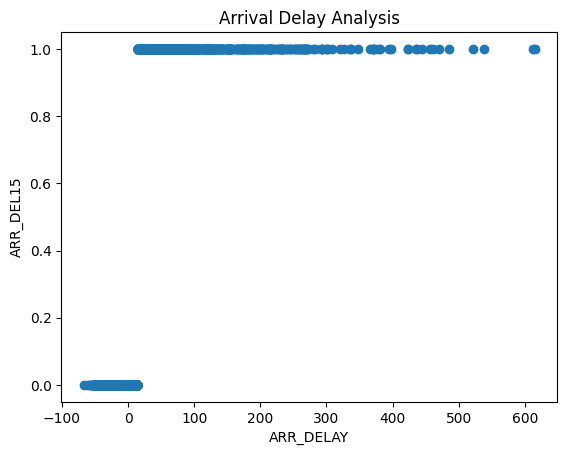

In [ ]:
plt.scatter(df.ARR_DELAY, df.ARR_DEL15)
plt.title('Arrival Delay Analysis')
plt.xlabel('ARR_DELAY')
plt.ylabel('ARR_DEL15')
plt.show()

**Using LinePoints**

<ipython-input-7-24234f163e63>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


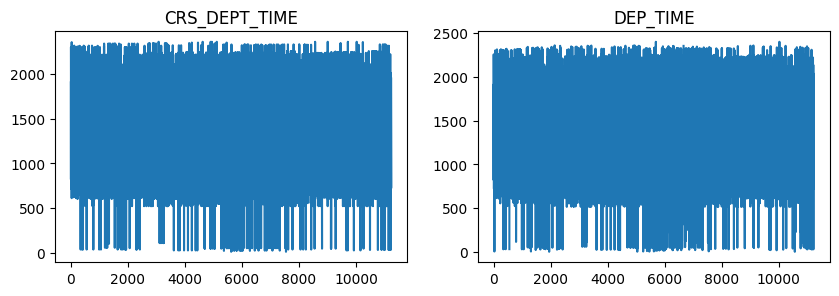

In [ ]:
fig, ax = plt.subplots(figsize=(10,3))
plt.subplot(1,2,1)
plt.title('CRS_DEPT_TIME')
plt.plot(df.CRS_DEP_TIME)
plt.subplot(1,2,2)
plt.title('DEP_TIME')
plt.plot(df.DEP_TIME)
plt.show()

<ipython-input-8-f2e1c8ad2203>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


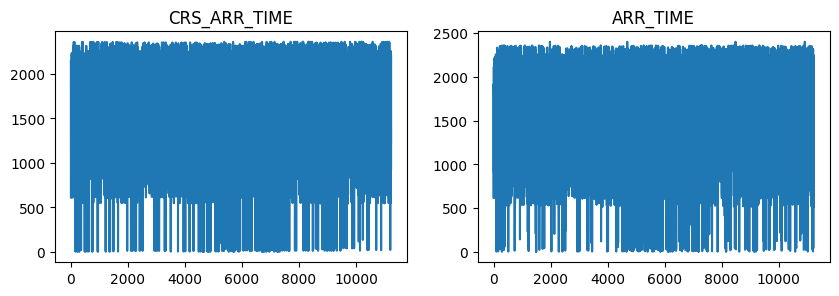

In [ ]:
fig, ax = plt.subplots(figsize=(10,3))
plt.subplot(1,2,1)
plt.title('CRS_ARR_TIME')
plt.plot(df.CRS_ARR_TIME)
plt.subplot(1,2,2)
plt.title('ARR_TIME')
plt.plot(df.ARR_TIME)
plt.show()

<ipython-input-9-a52a464aab9c>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


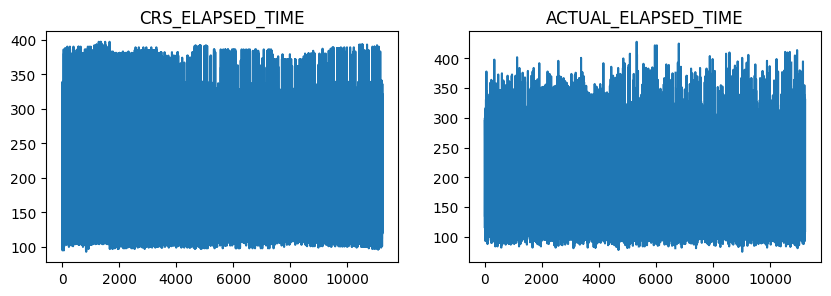

In [ ]:
fig, ax = plt.subplots(figsize=(10,3))
plt.subplot(1,2,1)
plt.title('CRS_ELAPSED_TIME')
plt.plot(df.CRS_ELAPSED_TIME)
plt.subplot(1,2,2)
plt.title('ACTUAL_ELAPSED_TIME')
plt.plot(df.ACTUAL_ELAPSED_TIME)
plt.show()

**Peforming Multivariate Analysis**

**Using pairplot**

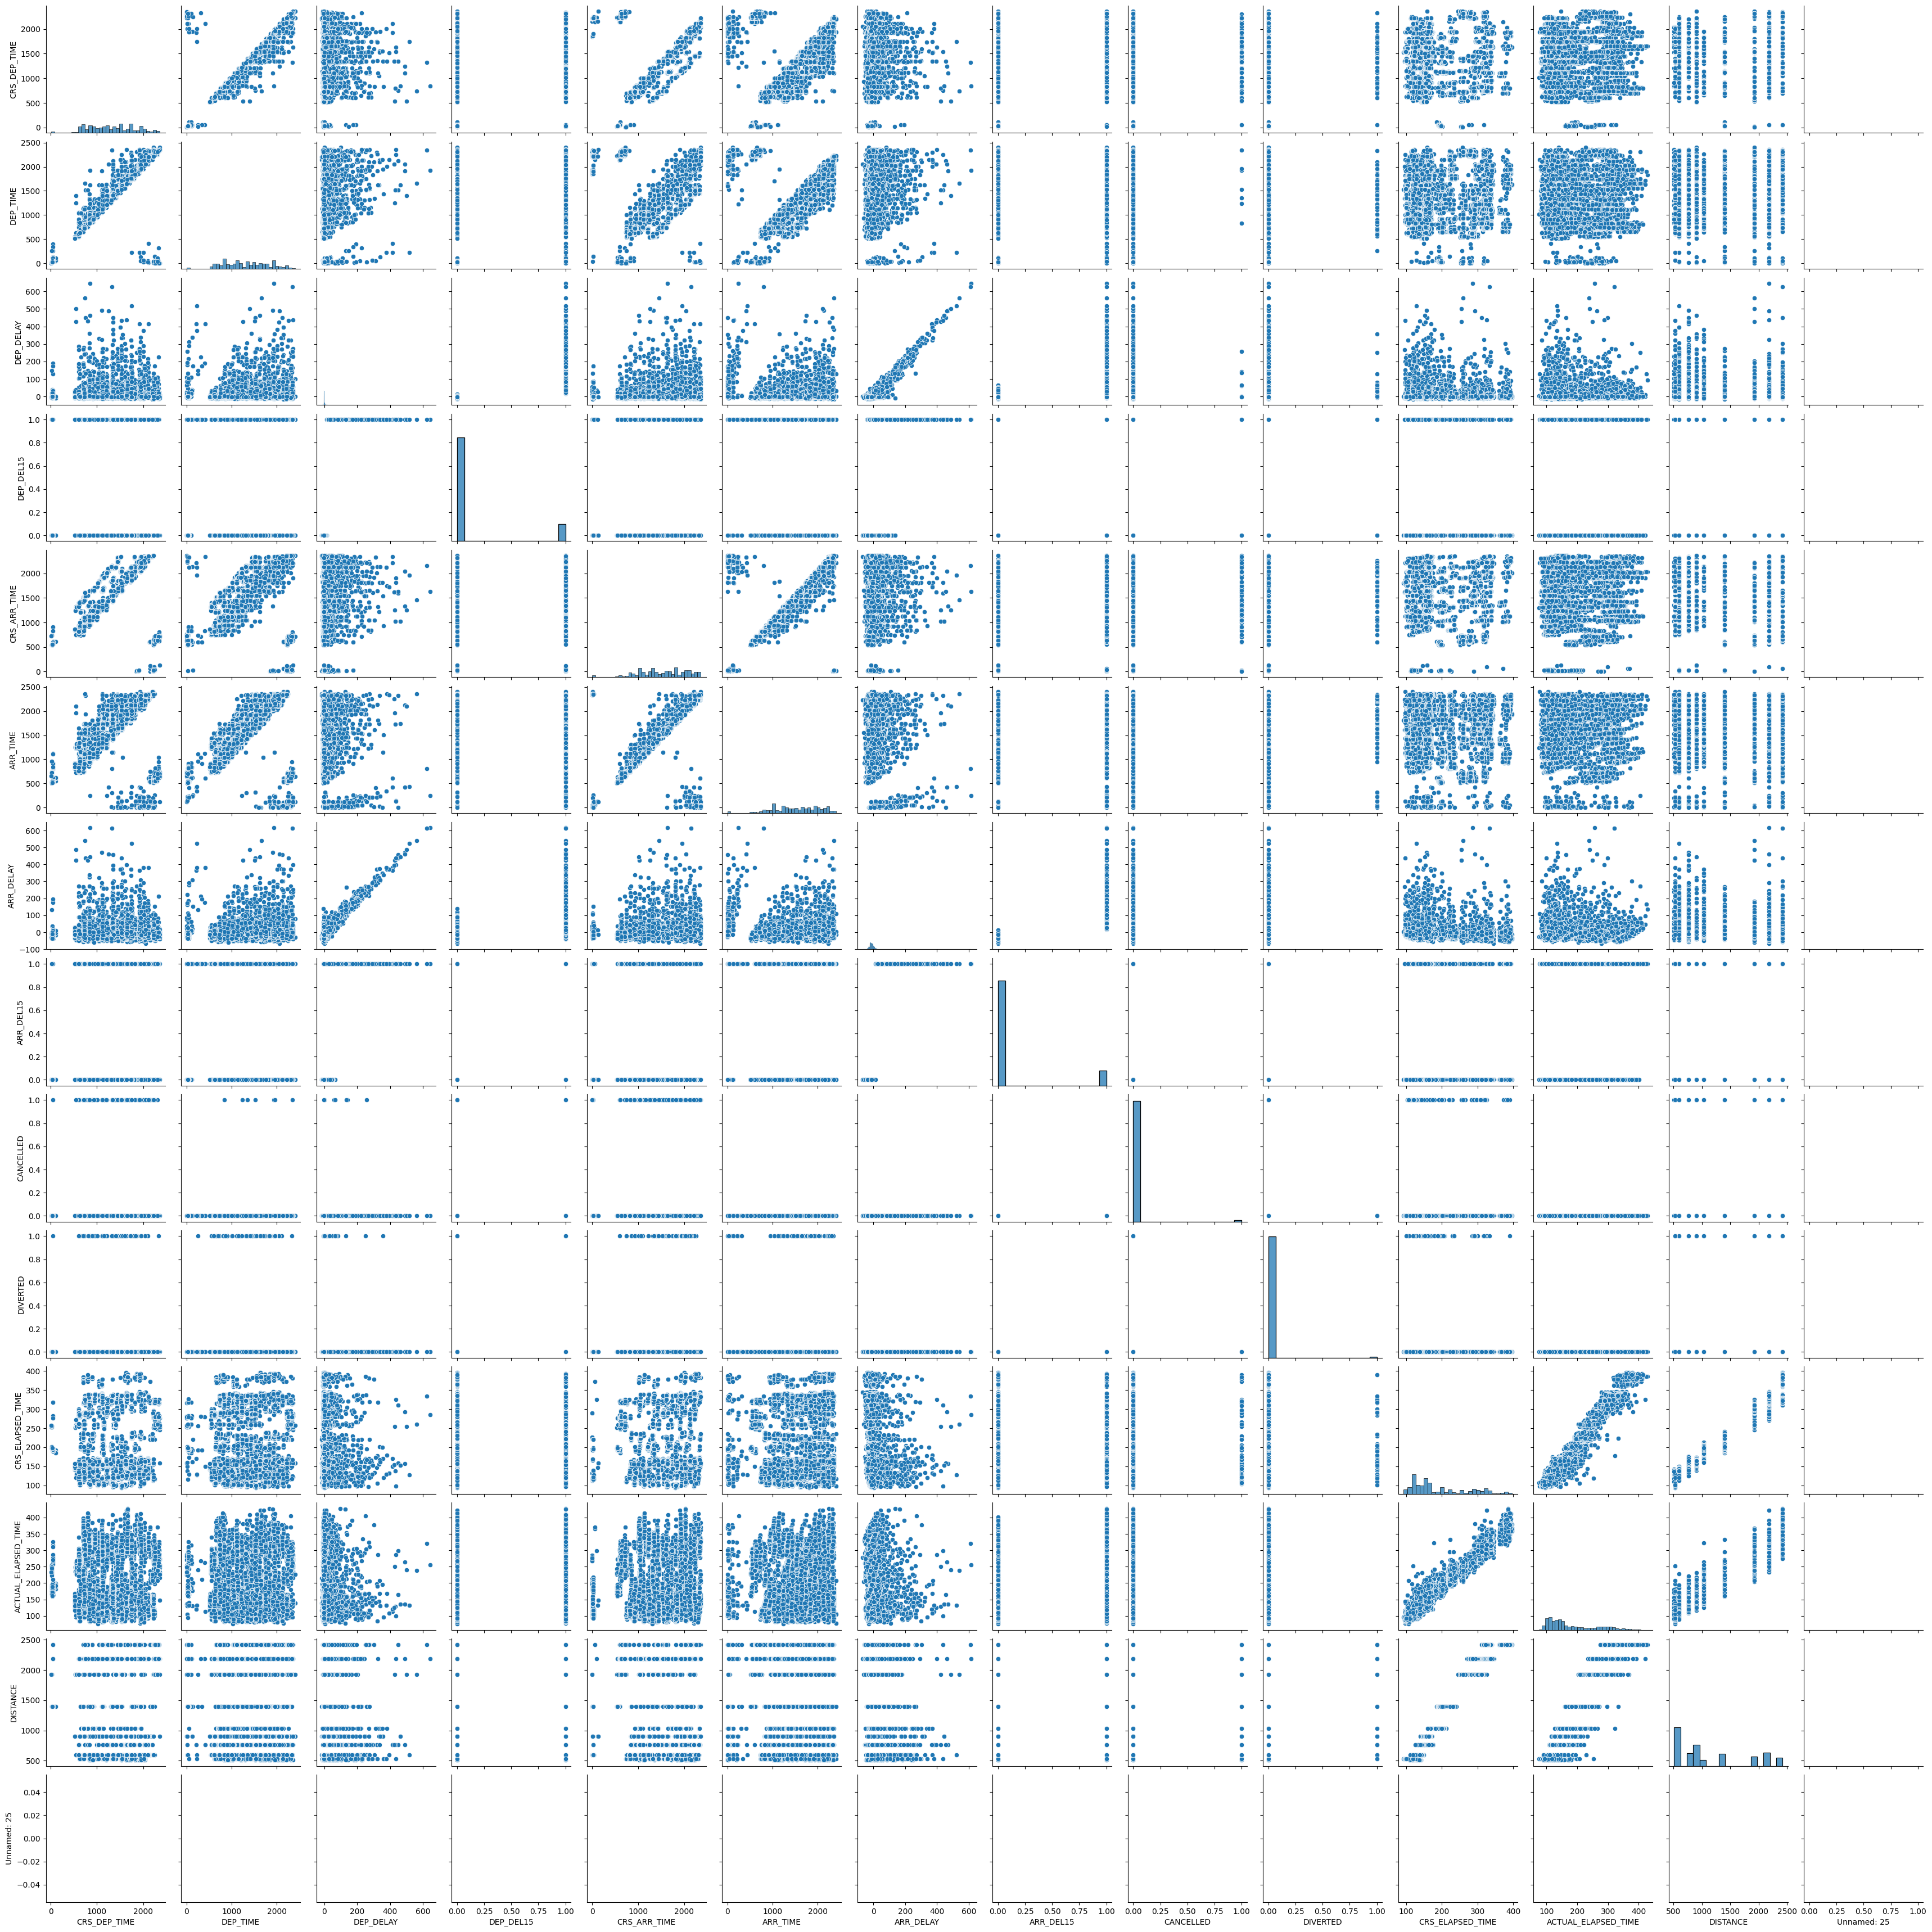

In [ ]:
sb.pairplot(df.iloc[:, 12:])
plt.show()

**Using heatmap**

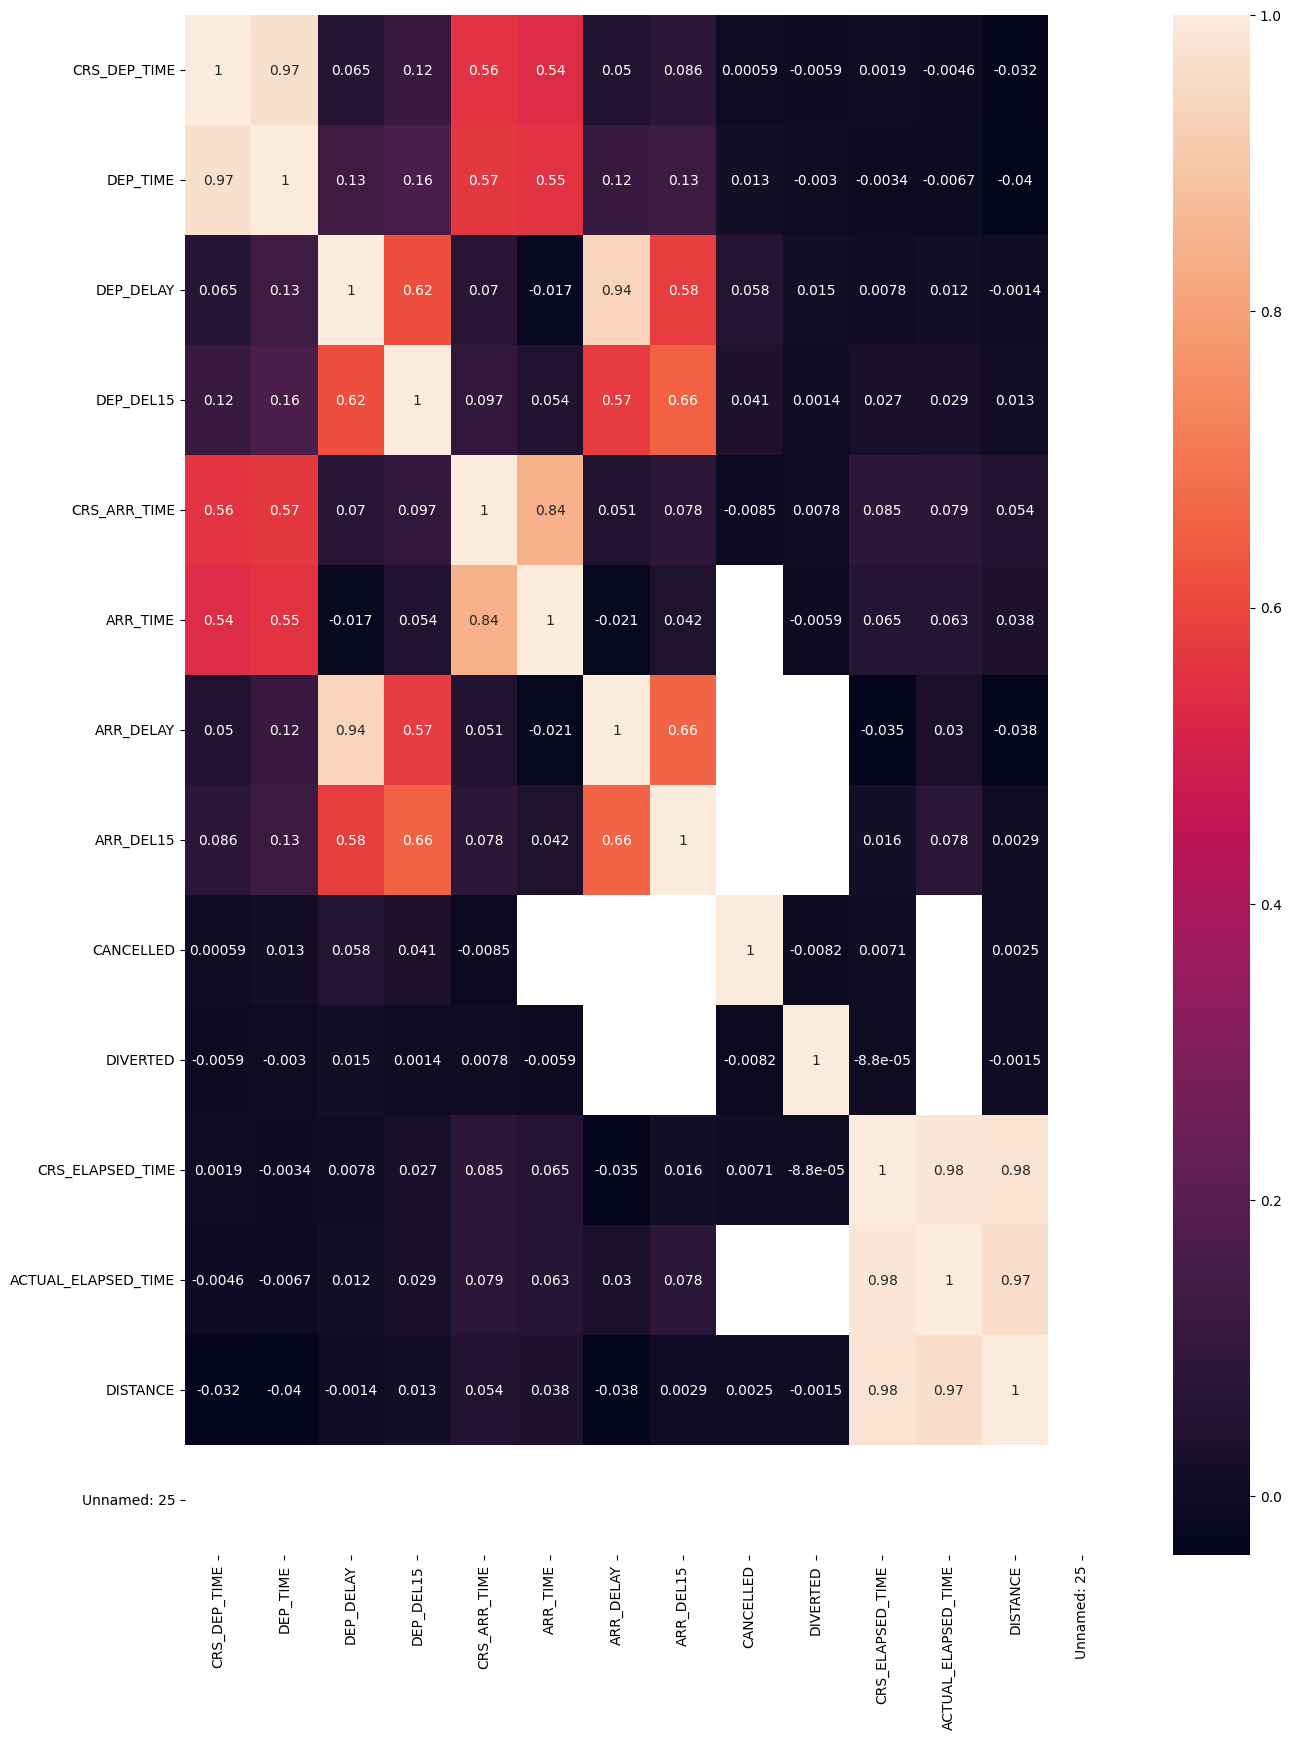

In [ ]:
fig,ax = plt.subplots(figsize=(15,20))
sb.heatmap(df.iloc[:,12:].corr(),annot=True,ax=ax)
plt.show()

**Performing Descriptive Analysis**

In [ ]:
df.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,...,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000,0.0
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.189410,...,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965,NaN
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,500.306462,...,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000,NaN
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,905.000000,...,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000,NaN
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,...,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,...,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000,NaN
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000,NaN


In [ ]:
df=df[['FL_NUM','MONTH','DAY_OF_MONTH','DAY_OF_WEEK','ORIGIN','DEST','DEP_DEL15','CRS_ARR_TIME','ARR_DEL15']]
df.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_DEL15,CRS_ARR_TIME,ARR_DEL15
0,1399,1,1,5,ATL,SEA,0.0,2143,0.0
1,1476,1,1,5,DTW,MSP,0.0,1435,0.0
2,1597,1,1,5,ATL,SEA,0.0,1215,0.0
3,1768,1,1,5,SEA,MSP,0.0,1335,0.0
4,1823,1,1,5,SEA,DTW,0.0,607,0.0


**Handling Missing Values**

In [ ]:
df.isnull().any()

FL_NUM          False
MONTH           False
DAY_OF_MONTH    False
DAY_OF_WEEK     False
ORIGIN          False
DEST            False
DEP_DEL15        True
CRS_ARR_TIME    False
ARR_DEL15        True
dtype: bool

**Replacing Null Values**

In [ ]:
df.fillna(df['DEP_DEL15'].mode()[0],inplace=True)
df.fillna(df['ARR_DEL15'].mode()[0],inplace=True)

**Checking if the replacement is made**

In [ ]:
df.isnull().any()

FL_NUM          False
MONTH           False
DAY_OF_MONTH    False
DAY_OF_WEEK     False
ORIGIN          False
DEST            False
DEP_DEL15       False
CRS_ARR_TIME    False
ARR_DEL15       False
dtype: bool

**Handling Outliers**

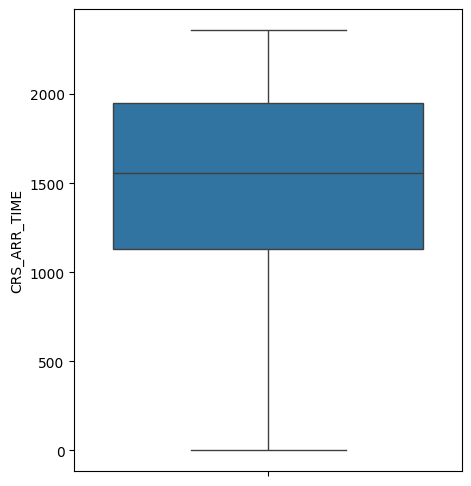

In [ ]:
fig,ax = plt.subplots(figsize=(5,6))
sb.boxplot(data=df['CRS_ARR_TIME'])
plt.show()

**Encoding**

**One Hot Encoding**

In [ ]:
df=pd.get_dummies(df,columns=['ORIGIN','DEST'])
df.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DEL15,CRS_ARR_TIME,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,1399,1,1,5,0.0,2143,0.0,True,False,False,False,False,False,False,False,False,True
1,1476,1,1,5,0.0,1435,0.0,False,True,False,False,False,False,False,False,True,False
2,1597,1,1,5,0.0,1215,0.0,True,False,False,False,False,False,False,False,False,True
3,1768,1,1,5,0.0,1335,0.0,False,False,False,False,True,False,False,False,True,False
4,1823,1,1,5,0.0,607,0.0,False,False,False,False,True,False,True,False,False,False


In [ ]:
df.columns

Index(['FL_NUM', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_DEL15',
       'CRS_ARR_TIME', 'ARR_DEL15', 'ORIGIN_ATL', 'ORIGIN_DTW', 'ORIGIN_JFK',
       'ORIGIN_MSP', 'ORIGIN_SEA', 'DEST_ATL', 'DEST_DTW', 'DEST_JFK',
       'DEST_MSP', 'DEST_SEA'],
      dtype='object')

**Splitting Dataset into Independent and Dependent Variables**

In [ ]:
X=df.drop(columns=['ARR_DEL15'])
Y=df[['ARR_DEL15']]

**Converting the dependent and independent variables into 1D array**


In [ ]:
X = X.values
Y = Y.values

**Splitting the dataset into training and test dataset**

In [ ]:

print(X)


print(Y)


[[1399 1 1 ... False False True]
 [1476 1 1 ... False True False]
 [1597 1 1 ... False False True]
 ...
 [1823 12 30 ... False False True]
 [1901 12 30 ... False False True]
 [2005 12 30 ... False False False]]
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)


In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8984, 16), (2247, 16), (8984, 1), (2247, 1))

**Building the machine learning models**

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=800)
log_reg.fit(X_train,Y_train.ravel())

LogisticRegression(max_iter=800)

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train.ravel())

DecisionTreeClassifier()

**KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train.ravel())

KNeighborsClassifier()

**Random Forest Clasifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=15,max_depth=3)
rf.fit(X_train,Y_train.ravel())

RandomForestClassifier(max_depth=3, n_estimators=15)

**Testing the models**

**Logistic Regression**

In [ ]:
Y_pred_log_train = log_reg.predict(X_train)
Y_pred_log_test = log_reg.predict(X_test)

In [ ]:
pd.DataFrame(Y_pred_log_train).value_counts()

0.0    7737
1.0    1247
Name: count, dtype: int64

In [ ]:
pd.DataFrame(Y_pred_log_test).value_counts()

0.0    1931
1.0     316
Name: count, dtype: int64

**Decision tree classifier**

In [ ]:
Y_pred_clf_train = clf.predict(X_train)
Y_pred_clf_test = clf.predict(X_test)

In [ ]:
pd.DataFrame(Y_pred_clf_train).value_counts()

0.0    7898
1.0    1086
Name: count, dtype: int64

In [ ]:
pd.DataFrame(Y_pred_clf_test).value_counts()

0.0    1944
1.0     303
Name: count, dtype: int64

**KNN Train Test**

In [ ]:
Y_pred_knn_train = knn.predict(X_train)
Y_pred_knn_test = knn.predict(X_test)

In [ ]:
pd.DataFrame(Y_pred_knn_train).value_counts()

0.0    8722
1.0     262
Name: count, dtype: int64

In [ ]:
pd.DataFrame(Y_pred_knn_test).value_counts()

0.0    2182
1.0      65
Name: count, dtype: int64

**Randomn Forest Classifier**

In [ ]:
Y_pred_rf_train = rf.predict(X_train)
Y_pred_rf_test = rf.predict(X_test)

In [ ]:
pd.DataFrame(Y_pred_rf_train).value_counts()

0.0    8094
1.0     890
Name: count, dtype: int64

In [ ]:
pd.DataFrame(Y_pred_rf_test).value_counts()

0.0    2014
1.0     233
Name: count, dtype: int64

**Evaluating the Ml Models using Metrics**

**Logistic Regression**

**Classification Report**

In [ ]:
print(classification_report(Y_test , Y_pred_log_test))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      1958
         1.0       0.68      0.74      0.71       289

    accuracy                           0.92      2247
   macro avg       0.82      0.84      0.83      2247
weighted avg       0.92      0.92      0.92      2247



**Accuracy, Precision, Recall, F1 Score**

In [ ]:
acc_log = accuracy_score(Y_test,Y_pred_log_test)
prec_log,rec_log,f1_log,sup_log = precision_recall_fscore_support(Y_test,Y_pred_log_test)
print("Accuracy Score = ",acc_log)
print("Precision = ",prec_log[0])
print("Recall = ",rec_log[0])
print("F1 Score = ",f1_log[0])

Accuracy Score =  0.9212283044058746
Precision =  0.9611600207146557
Recall =  0.947906026557712
F1 Score =  0.9544870146567241


**Checking for overfitting and underfitting**

In [ ]:
log_train_acc = accuracy_score(Y_train,Y_pred_log_train)
log_test_acc = accuracy_score(Y_test,Y_pred_log_test)
print("Training Accuracy = ",log_train_acc)
print("Testing Accuracy = ",log_test_acc)

Training Accuracy =  0.9201914514692787
Testing Accuracy =  0.9212283044058746


**Confusion Matrix**

In [ ]:
pd.crosstab(Y_test.ravel(),Y_pred_log_test)

col_0,0.0,1.0
row_0,,
0.0,1856,102
1.0,75,214


**Decision Tree Classifier**

**Classification Report**

In [ ]:
print(classification_report(Y_test,Y_pred_clf_test))

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93      1958
         1.0       0.51      0.53      0.52       289

    accuracy                           0.87      2247
   macro avg       0.72      0.73      0.72      2247
weighted avg       0.88      0.87      0.87      2247



**Accuracy,Precision,Recall,F1score**

In [ ]:
acc_clf = accuracy_score(Y_test,Y_pred_clf_test)
prec_clf,rec_clf,f1_clf,sup_clf = precision_recall_fscore_support(Y_test,Y_pred_clf_test)
print("Accuracy Score = ",acc_clf)
print("Precision = ",prec_clf[0])
print("Recall = ",rec_clf[0])
print("F1 Score  = ",f1_clf[0])

Accuracy Score =  0.8736092567868269
Precision =  0.9305555555555556
Recall =  0.9239019407558733
F1 Score  =  0.9272168118913378


**Checking for Overfitting and Underfitting**

In [ ]:
clf_train_acc = accuracy_score(Y_train,Y_pred_clf_train)
clf_test_acc = accuracy_score(Y_test,Y_pred_clf_test)
print("Training Accuracy = ",clf_train_acc)
print("Testing Accuracy = ",clf_test_acc)

Training Accuracy =  1.0
Testing Accuracy =  0.8736092567868269


**Confusion Matrix**

In [ ]:
pd.crosstab(Y_test.ravel(),Y_pred_clf_test)

col_0,0.0,1.0
row_0,,
0.0,1809,149
1.0,135,154


**KNN Classifier**

**Classification Report**

In [ ]:
print(classification_report(Y_test,Y_pred_knn_test))

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92      1958
         1.0       0.31      0.07      0.11       289

    accuracy                           0.86      2247
   macro avg       0.59      0.52      0.52      2247
weighted avg       0.80      0.86      0.82      2247



**Accuracy,Precision,Recall,F1score**

In [ ]:
acc_knn = accuracy_score(Y_test,Y_pred_knn_test)
prec_knn,rec_knn,f1_knn,sup_knn = precision_recall_fscore_support(Y_test,Y_pred_knn_test)
print("Accuracy Score = ",acc_knn)
print("Precision = ",prec_knn[0])
print("Recall = ",rec_knn[0])
print("F1 Score  = ",f1_knn[0])

Accuracy Score =  0.8602581219403649
Precision =  0.8767186067827681
Recall =  0.9770173646578141
F1 Score  =  0.9241545893719807


**Checking for Overfitting and Underfitting**

In [ ]:
knn_train_acc = accuracy_score(Y_train,Y_pred_knn_train)
knn_test_acc = accuracy_score(Y_test,Y_pred_knn_test)
print("Training Accuracy = ",knn_train_acc)
print("Testing Accuracy = ",knn_test_acc)

Training Accuracy =  0.8884683882457702
Testing Accuracy =  0.8602581219403649


**Confusion Matrix**

In [ ]:
pd.crosstab(Y_test.ravel(),Y_pred_knn_test)

col_0,0.0,1.0
row_0,,
0.0,1913,45
1.0,269,20


**Ramdom Forest Classifier**

**Classification report**

In [ ]:
print(classification_report(Y_test,Y_pred_rf_test))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1958
         1.0       0.70      0.57      0.63       289

    accuracy                           0.91      2247
   macro avg       0.82      0.77      0.79      2247
weighted avg       0.91      0.91      0.91      2247



**Accuracy, Precision, Recall, F1 score**

In [ ]:
acc_rf = accuracy_score(Y_test,Y_pred_rf_test)
prec_rf, rec_rf, f1_rf, sup_rf = precision_recall_fscore_support(Y_test,Y_pred_rf_test)
print('Accuracy score=', acc_rf)
print('Precision=',prec_rf[0])
print('Recall=',rec_rf[0])
print('F1 Score=', f1_rf[0])


Accuracy score= 0.9136626613262128
Precision= 0.9379344587884806
Recall= 0.9647599591419816
F1 Score= 0.9511581067472307


**Checking for overfitting and underfitting**

In [ ]:
rf_train_acc = accuracy_score(Y_train, Y_pred_rf_train)
rf_test_acc = accuracy_score(Y_test, Y_pred_rf_test)
print('Training Accuracy=', rf_train_acc)
print('Testing Accuracy=', rf_test_acc)


Training Accuracy= 0.9180765805877115
Testing Accuracy= 0.9136626613262128


**Confusion Matrix**

In [ ]:
pd.crosstab(Y_test.ravel(),Y_pred_rf_test)

col_0,0.0,1.0
row_0,,
0.0,1889,69
1.0,125,164


**Hyper Parameter Tuning**

**Tuning the Hyperparameters of Logistic Regression**

In [ ]:
parameters = { 'solver':['newton-cg', 'lbfgs', 'liblinear'],
             'C':[100, 10, 1.0, 0.1, 0.01],
             'penalty':['l2']}

In [ ]:
tuned_model = GridSearchCV(LogisticRegression(max_iter=800), param_grid=parameters, verbose=2)
tuned_model.fit(X_train, Y_train.ravel())

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.5s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.8s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.8s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   1.2s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .................C=

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.5s
[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV] END .................C=10, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.5s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=1.0, penalty=l2, solver=newton-cg; total time=   0.4s
[CV] END ................C=1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.1s


GridSearchCV(estimator=LogisticRegression(max_iter=800),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=2)

In [ ]:
Y_pred_tun_train = tuned_model.predict(X_train)
Y_pred_tun_test = tuned_model.predict(X_test)

In [ ]:
pd.DataFrame(Y_pred_tun_train).value_counts()

0.0    7745
1.0    1239
Name: count, dtype: int64

In [ ]:
pd.DataFrame(Y_pred_tun_test).value_counts()

0.0    1933
1.0     314
Name: count, dtype: int64

**Evaluating the Tuned Model Using Metrics**

**Classification Report**

In [ ]:
print(classification_report(Y_test, Y_pred_tun_test))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      1958
         1.0       0.68      0.73      0.70       289

    accuracy                           0.92      2247
   macro avg       0.82      0.84      0.83      2247
weighted avg       0.92      0.92      0.92      2247



**Accuracy, Precision, Recall, F1 Score**

In [ ]:
acc_tun = accuracy_score(Y_test, Y_pred_tun_test)
prec_tun , rec_tun, f1_tun, sup_tun = precision_recall_fscore_support(Y_test, Y_pred_tun_test)
print('Accuracy Score =' , acc_tun)
print('Precision =' , prec_tun[0])
print('Recall =' , rec_tun[0])
print('F1 Score =' , f1_tun[0])

Accuracy Score = 0.9203382287494437
Precision = 0.9601655457837558
Recall = 0.947906026557712
F1 Score = 0.9539964019532254


**Checking for Overfitting and Underfitting**

In [ ]:
tun_train_acc = accuracy_score(Y_train, Y_pred_tun_train)
tun_test_acc = accuracy_score(Y_test, Y_pred_tun_test)
print('Training Accuracy =' , tun_train_acc)
print('Testing Accuarcy =' , tun_test_acc)

Training Accuracy = 0.9199688334817453
Testing Accuarcy = 0.9203382287494437


There is no big variation in training and testing accuracy. Therefore, the tuned logistic regression model is not overfit or underfit

**Confusion matrix**

In [ ]:
pd.crosstab(Y_test.ravel(), Y_pred_tun_test)

col_0,0.0,1.0
row_0,,
0.0,1856,102
1.0,77,212


There is not much improvement in the logistic regression model after hyper parametre tuning . Hence the original model is used

**Dumping the chosen file in pkl file**

In [ ]:
joblib.dump(log_reg, 'model.pkl')


['model.pkl']